In [1]:
import matplotlib.pyplot as plt
import numpy as np
import uproot
import os

In [2]:
plt.style.use('snoplus')

class read_data:
    def __init__(self, flist):
        self.pe = []
        self.gamma = {}
        if type(flist) == str:
            flist = [flist]
        for f in flist:
            tf = uproot.open(f)
            pe_t = tf['pe']
            pe = pe_t.arrays(['pe'])[b'pe']
            self.pe.append(pe)

            gam_t = tf['gamma']
            gam_t.keys()
            obs = gam_t.arrays(['energy', 'vector'])
            energy = obs[b'energy']
            vec = obs[b'vector']
            for e,v in zip(energy, vec):
                try:
                    (self.gamma[e]).append(v)
                except KeyError:
                    self.gamma[e] = [v]

        self.pe = np.concatenate(self.pe)
        for k,v in self.gamma.items():
            try:
                self.gamma[k] = np.concatenate(v)
            except ValueError:
                pass
            
def histogram(events, **kwargs):
    '''
    Give the x,y coordinates of bins within
    a histogram, implemented with np.histogram, and passes
    kwargs directly to np.histogram. Plot the returned
    x,y values with pyplot.step(x, y, where='mid')
    '''
    y, x = np.histogram(events, **kwargs)
    kx = ((x + np.roll(x, -1))/2.)[:-1]
    return kx, y

['1mm_3_data.root', '1mm_9_data.root', '1mm_4_data.root', '1mm_8_data.root', '1mm_5_data.root', '1mm_7_data.root', '1mm_6_data.root', '1mm_2_data.root', '1mm_1_data.root', '1mm_10_data.root']
['4mm_2_data.root', '4mm_9_data.root', '4mm_10_data.root', '4mm_6_data.root', '4mm_3_data.root', '4mm_8_data.root', '4mm_4_data.root', '4mm_7_data.root', '4mm_5_data.root', '4mm_1_data.root']
Entries 1mm: 0.7495
Entries 1mm: 0.72112


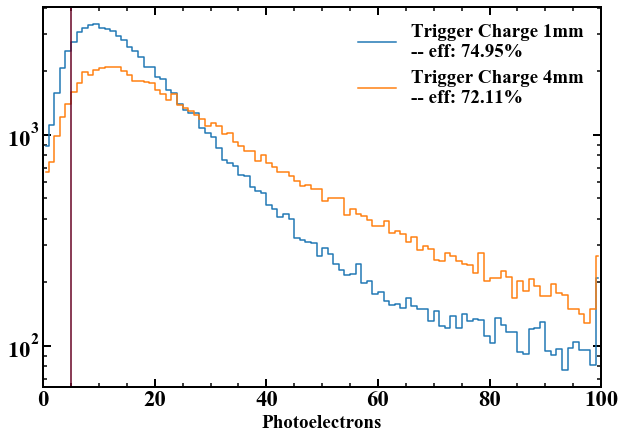

Energy: 1.75 => 0.2390


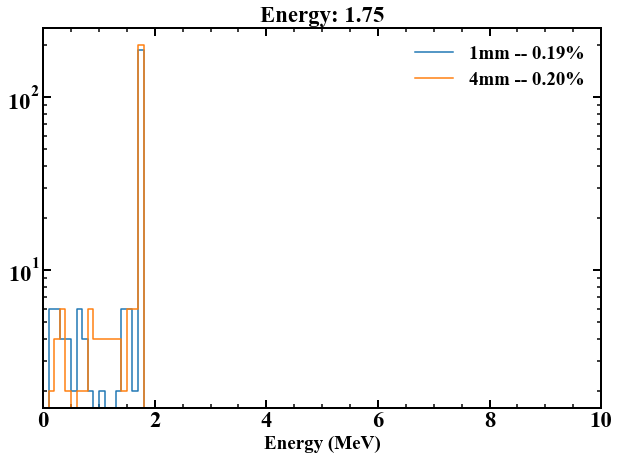

Energy: 1.95 => 0.0880


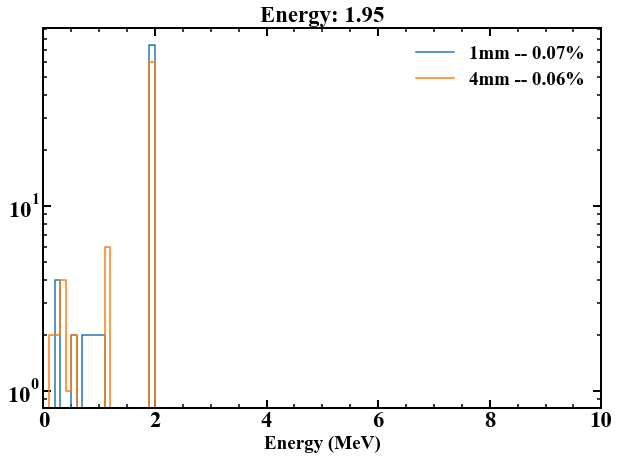

Energy: 2.74 => 1.5110


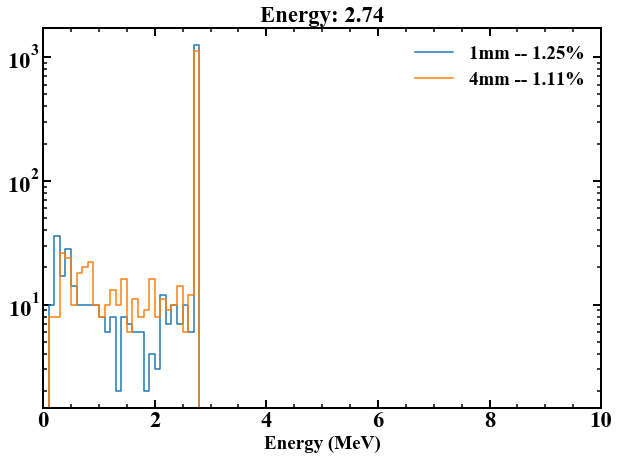

Energy: 6.13 => 62.2170


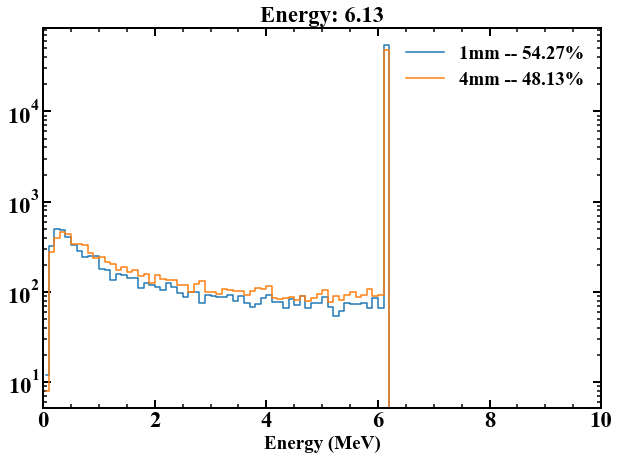

Energy: 6.92 => 0.0440


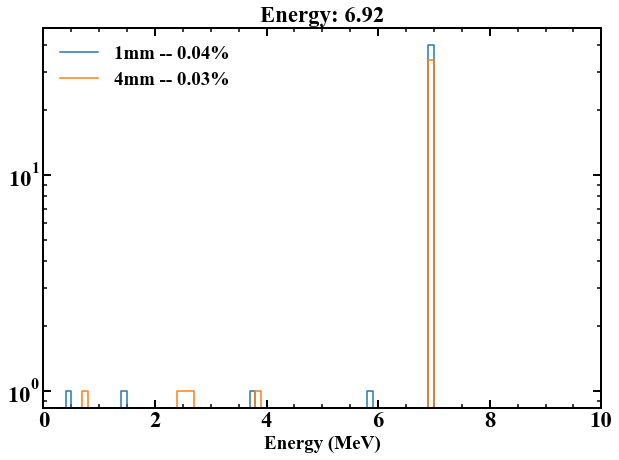

Energy: 7.12 => 4.4910


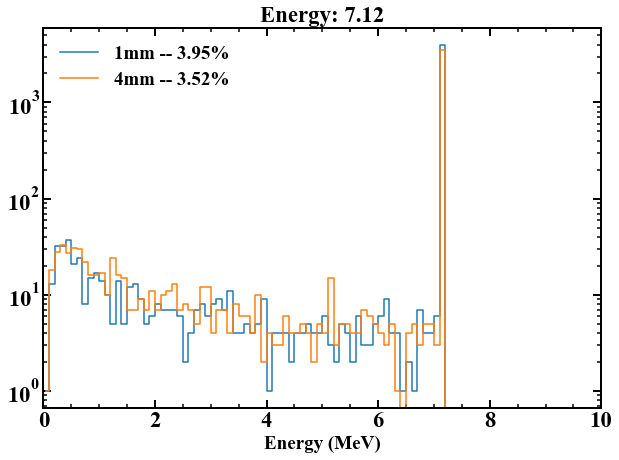

Energy: 8.78 => 0.0020


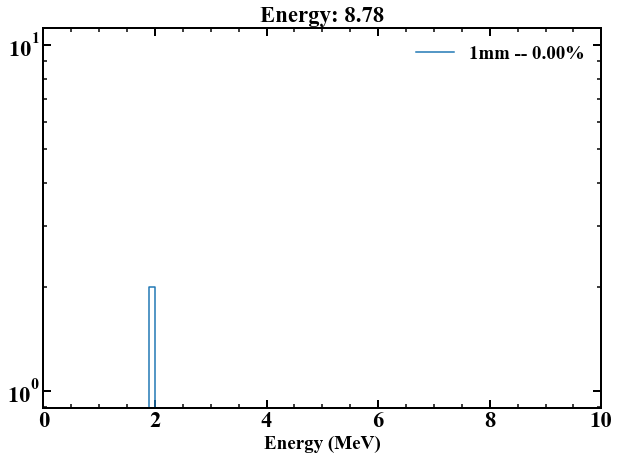

Energy: 8.87 => 0.0710


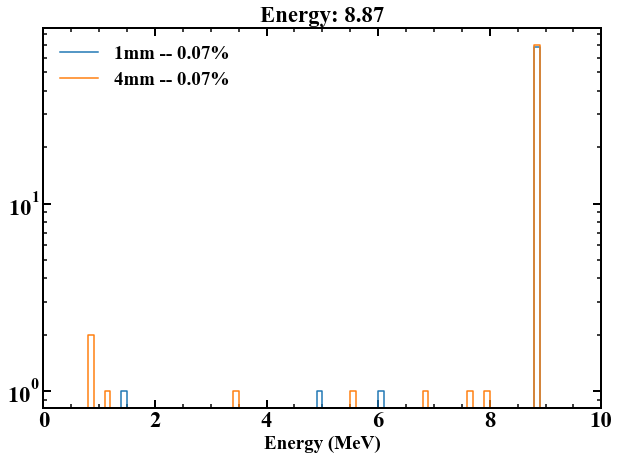

Energy: 9.24 => 0.0020


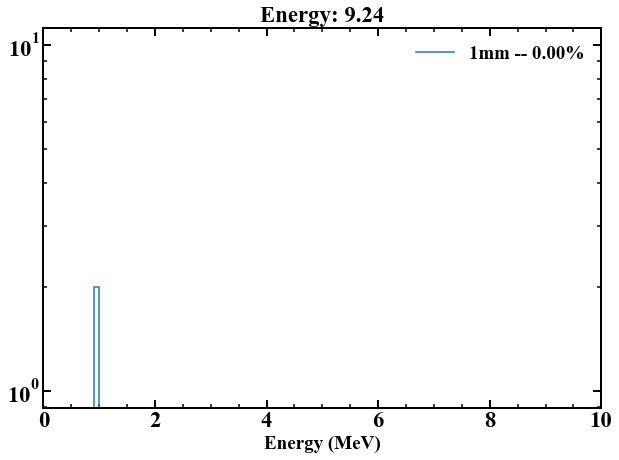

Energy: 9.71 => 0.0020


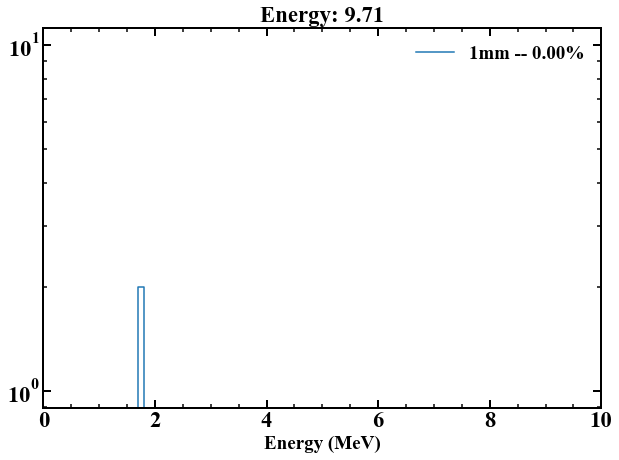

Energy: 8.91 => 0.0020


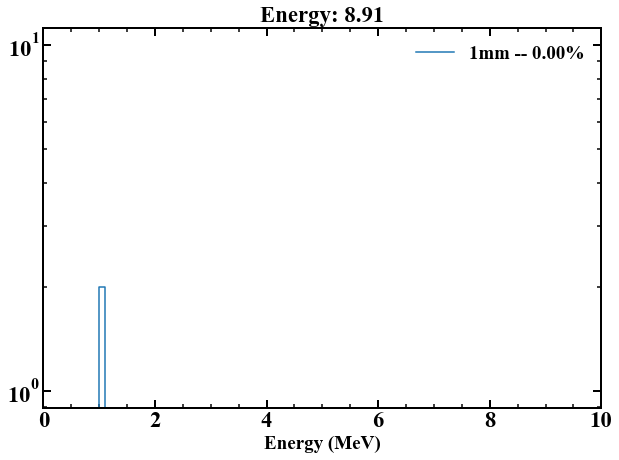

Energy: 9.08 => 0.0020


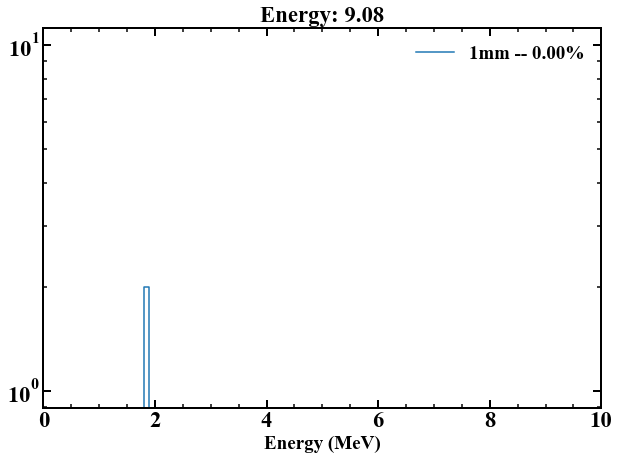

Energy: 9.54 => 0.0020


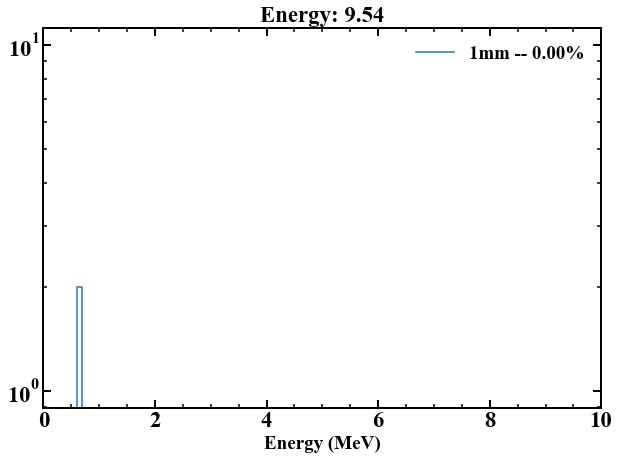

Energy: 9.55 => 0.0020


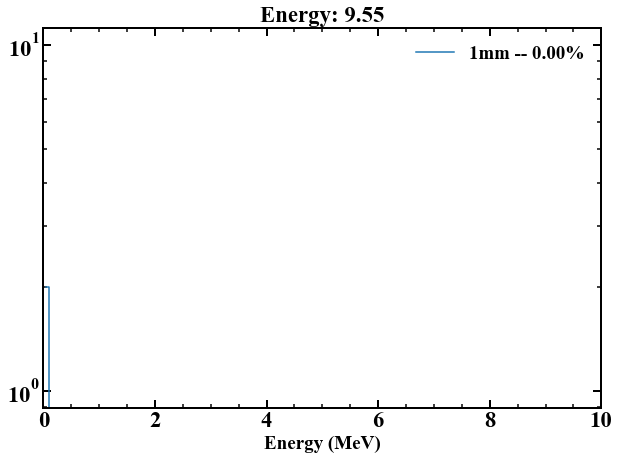

Energy: 8.87 => 0.0020


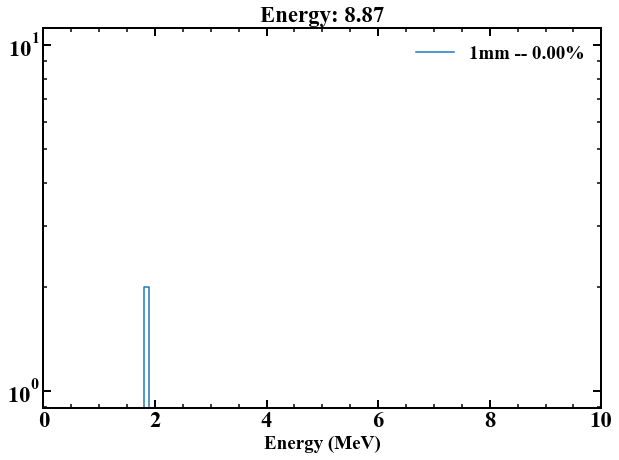

Energy: 9.57 => 0.0020


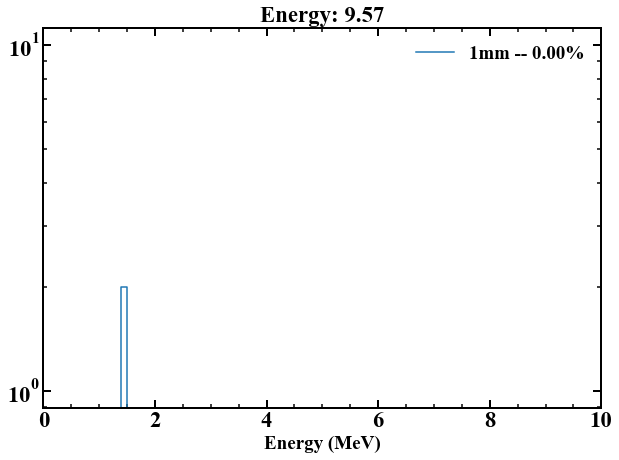

Energy: 9.93 => 0.0020


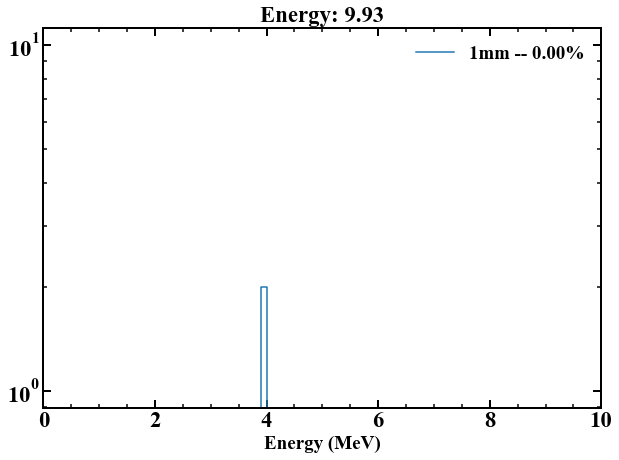

Energy: 9.01 => 0.0020


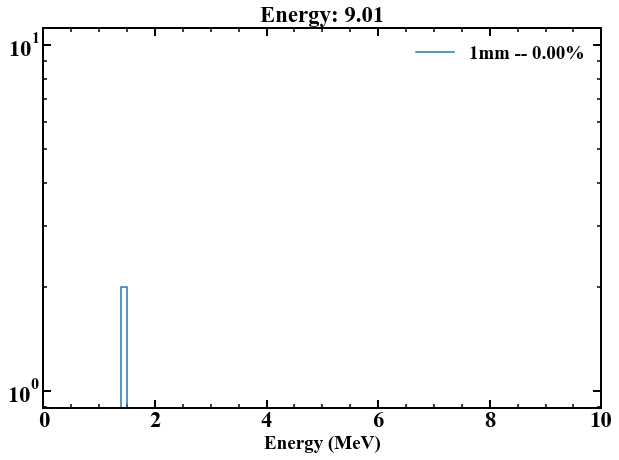

Energy: 9.23 => 0.0020


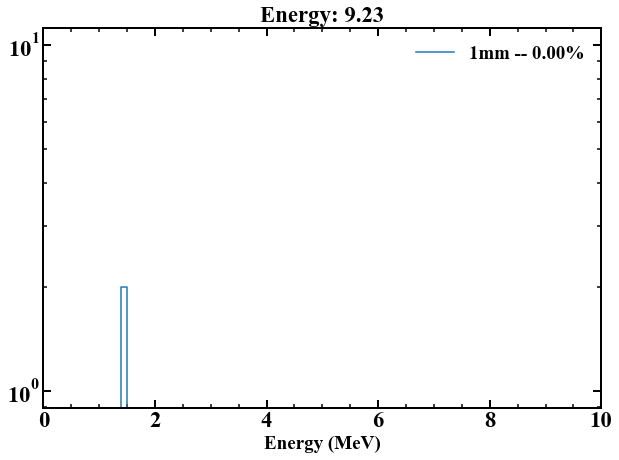

Energy: 9.46 => 0.0020


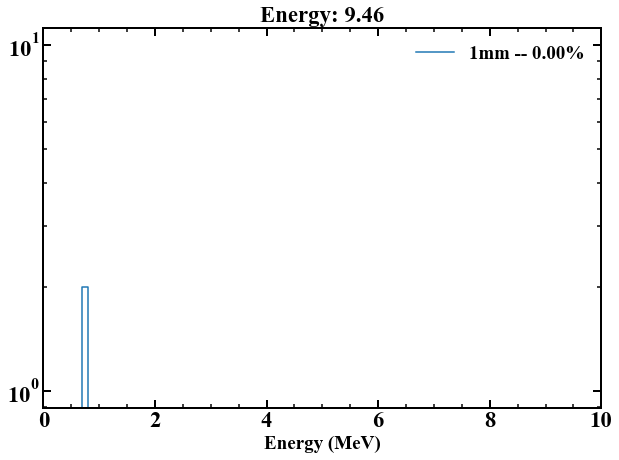

Energy: 9.56 => 0.0020


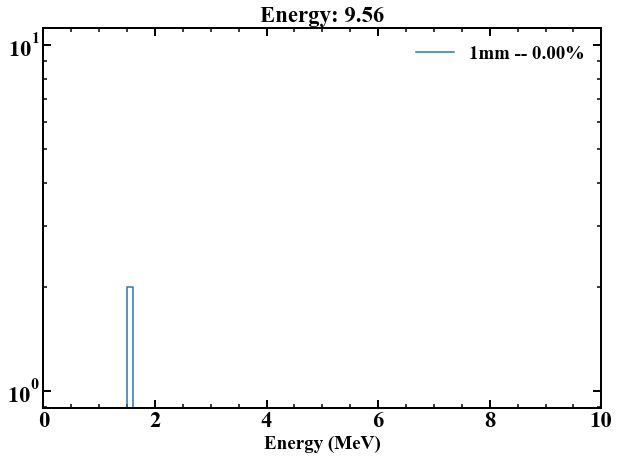

Energy: 8.82 => 0.0020


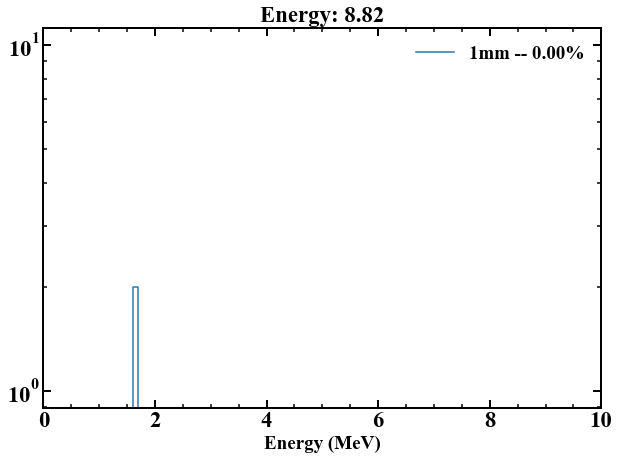

Energy: 8.90 => 0.0020


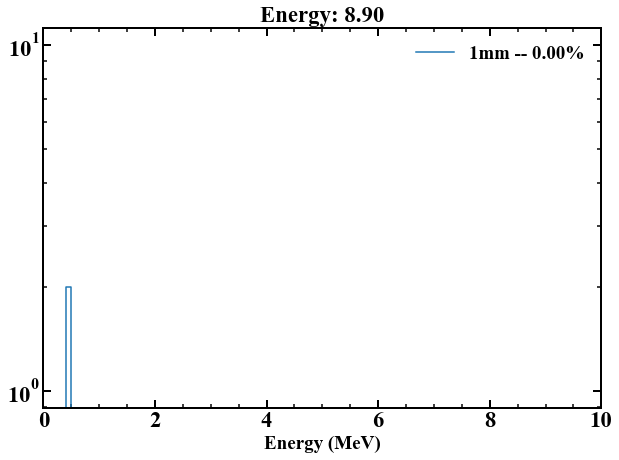

Energy: 9.20 => 0.0020


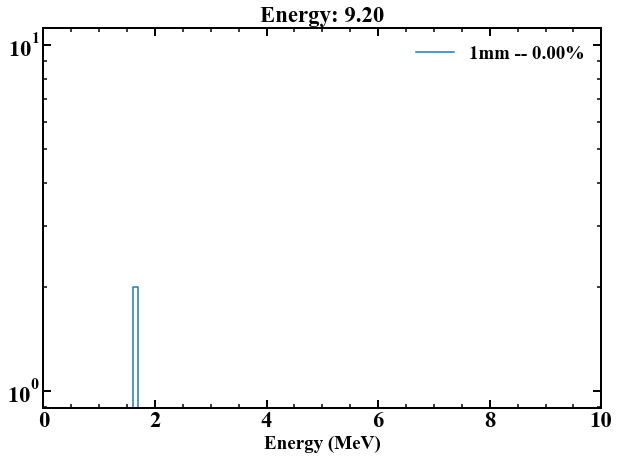

Energy: 9.32 => 0.0020


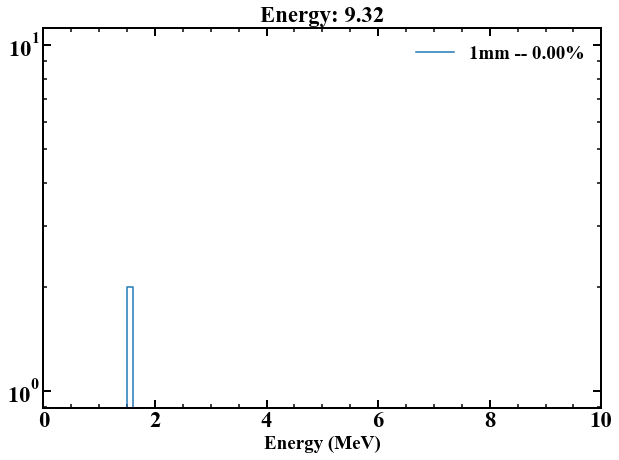

Energy: 9.34 => 0.0020


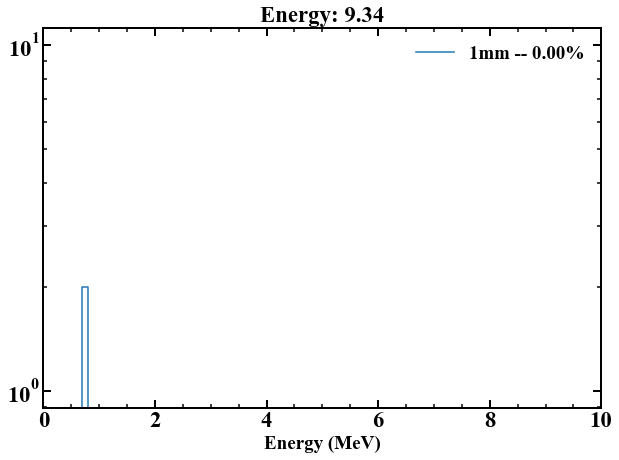

Energy: 9.54 => 0.0020


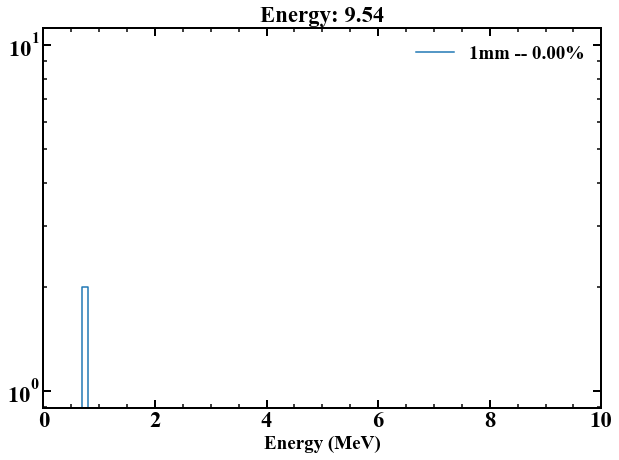

Energy: 9.63 => 0.0020


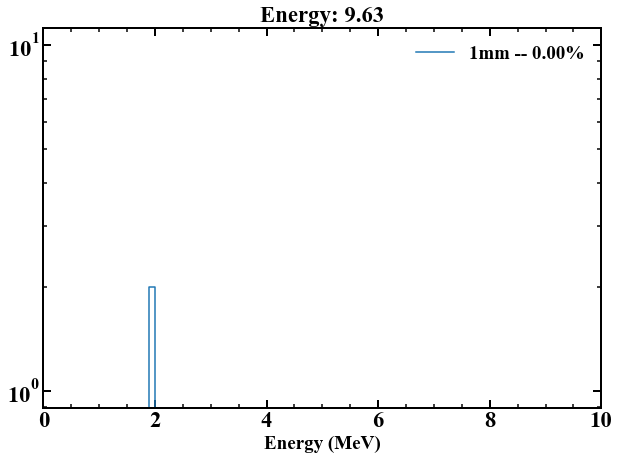

Energy: 9.89 => 0.0020


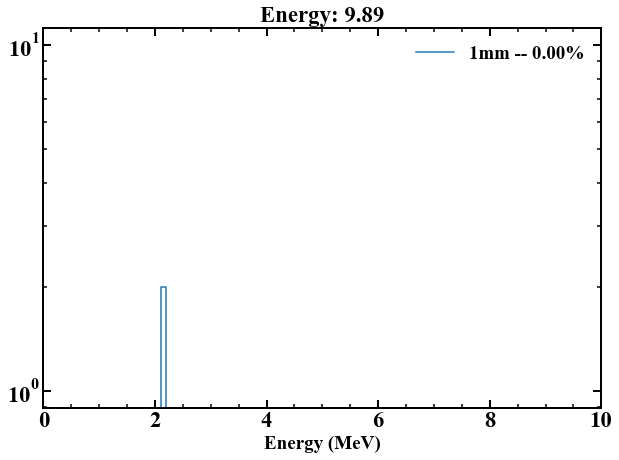

Energy: 8.58 => 0.0020


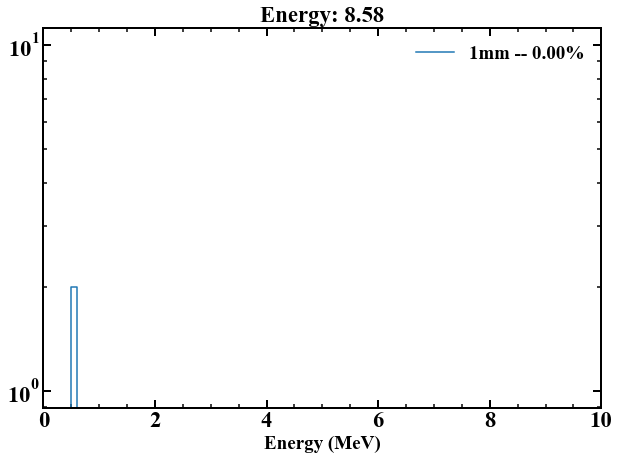

Energy: 8.95 => 0.0020


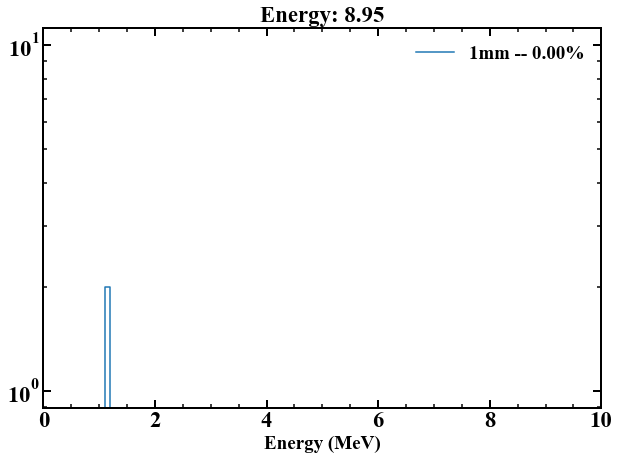

Energy: 9.57 => 0.0020


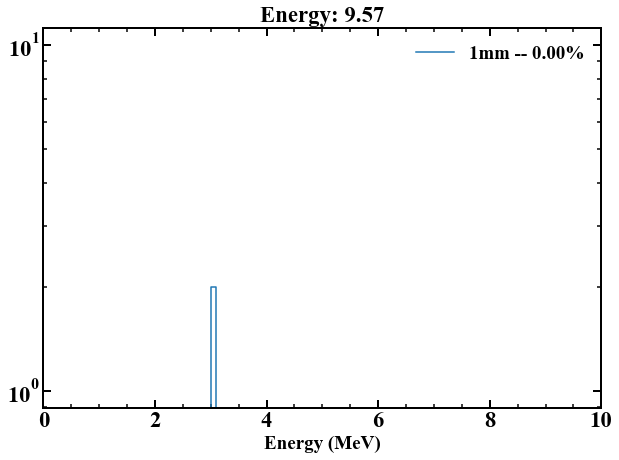

Energy: 9.68 => 0.0020


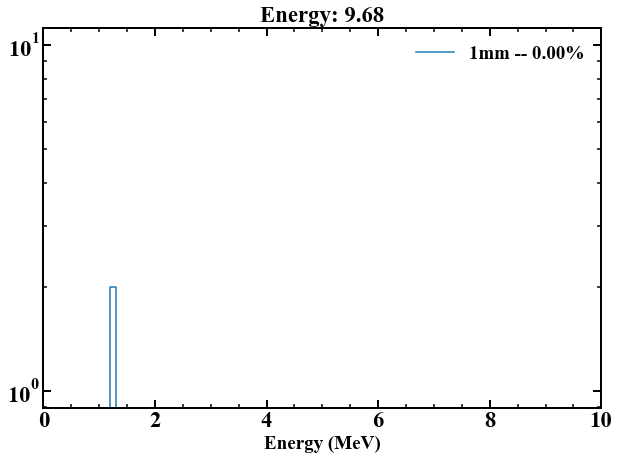

Energy: 9.04 => 0.0020


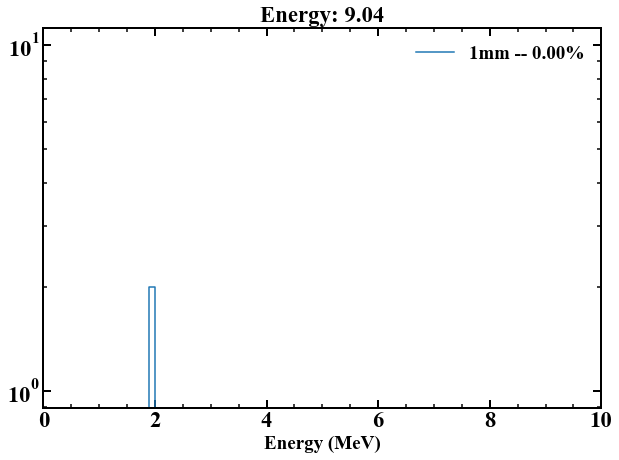

Energy: 9.08 => 0.0020


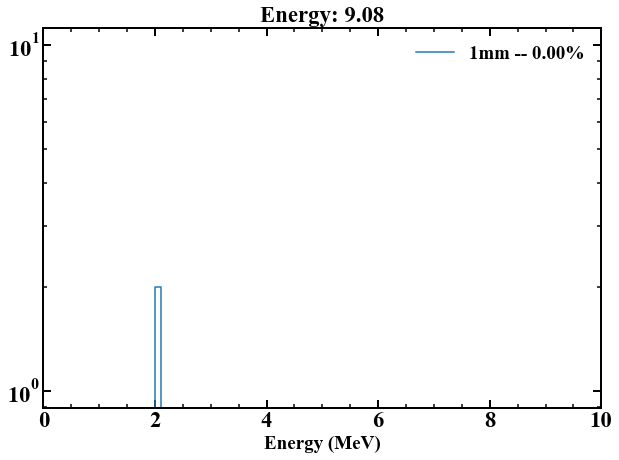

Energy: 9.36 => 0.0020


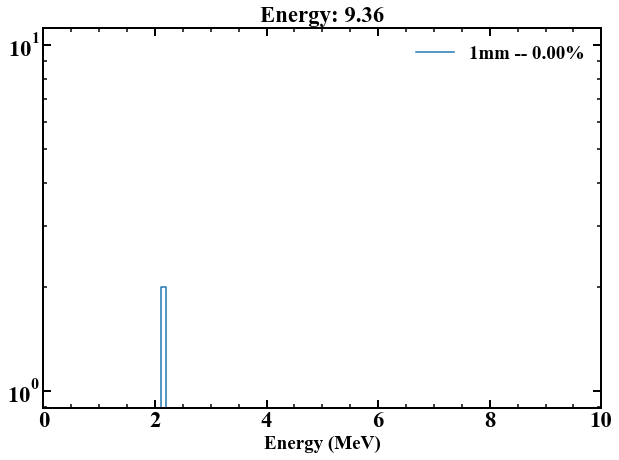

In [4]:
flist = [f for f in os.listdir() if '1mm' in f]
flist = [f for f in flist if 'data' in f]

flist2 = [f for f in os.listdir() if '4mm' in f]
flist2 = [f for f in flist2 if 'data' in f]

print(flist)
print(flist2)

j = read_data(flist)
j2 = read_data(flist2)

#j = read_data('1mm_1_data.root')
#j2 = read_data('4mm_1_data.root')
nhit = 5


x,y = histogram(j.pe, bins=np.linspace(0,100,101))
trig_eff = np.sum(y[x>nhit])/100000
print(f'Entries 1mm: {trig_eff}')
plt.step(x,y,where='mid', label=f'Trigger Charge 1mm\n-- eff: {100*trig_eff:0.2f}%')
x,y = histogram(j2.pe, bins=np.linspace(0,100,101))
trig_eff = np.sum(y[x>nhit])/100000
print(f'Entries 1mm: {trig_eff}')
plt.step(x,y,where='mid', label=f'Trigger Charge 4mm\n-- eff: {100*trig_eff:0.2f}%')
plt.xlim(0,100)
plt.yscale('log')
plt.xlabel('Photoelectrons')
plt.axvline(nhit, color='xkcd:maroon')
plt.legend()
plt.show()

for e,v in j.gamma.items():
    bins = np.linspace(0, 10, 101)
    x, y = histogram(v, bins=bins)
    eff = (y[y>0])[-1]/100000
    print(f'Energy: {e:0.2f} => {100*np.sum(y)/100000:0.4f}')
    plt.step(x, y, where='mid', label=f'1mm -- {100*eff:0.2f}%')
    try:
        x, y = histogram(j2.gamma[e], bins=bins)
        eff = (y[y>0])[-1]/100000
        plt.step(x, y, where='mid', label=f'4mm -- {100*eff:0.2f}%')
    except:
        pass
    plt.title(f'Energy: {e:0.2f}')
    plt.legend()
    plt.xlim(0, 10)
    plt.yscale('log')
    plt.xlabel('Energy (MeV)')
    plt.show()

['1mm_3_data.root', '1mm_9_data.root', '1mm_4_data.root', '1mm_8_data.root', '1mm_5_data.root', '1mm_7_data.root', '1mm_6_data.root', '1mm_2_data.root', '1mm_1_data.root', '1mm_10_data.root']


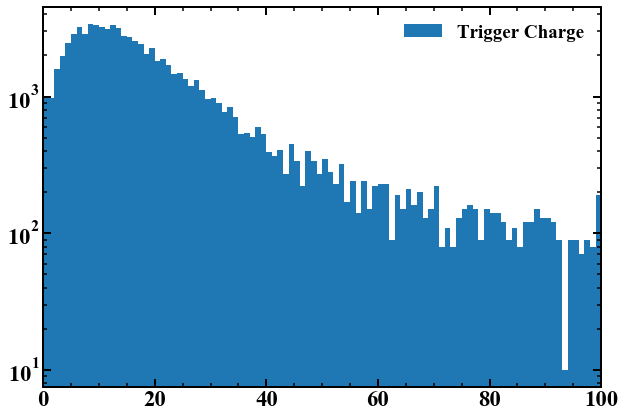

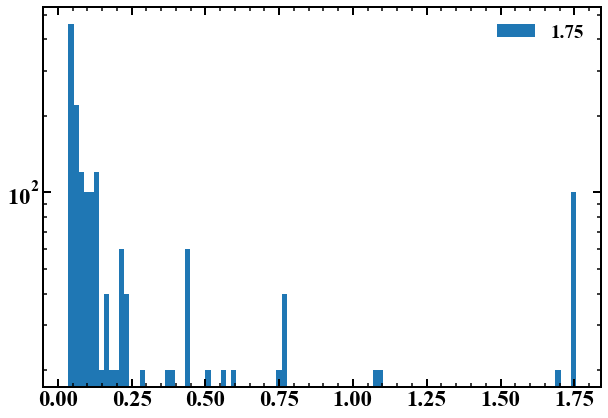

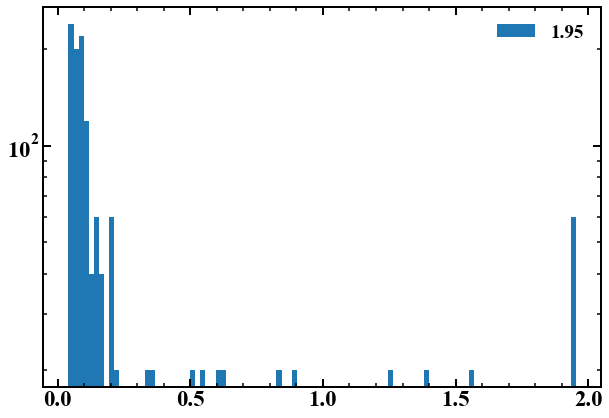

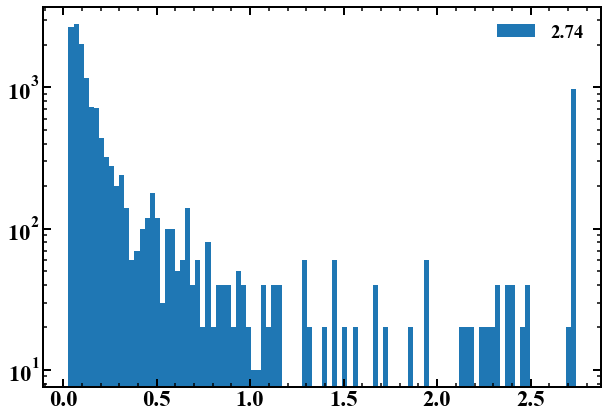

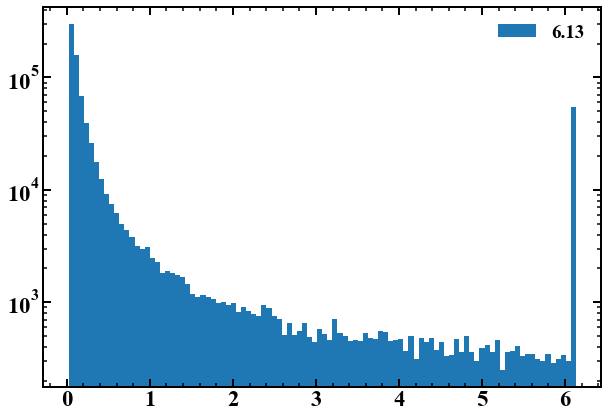

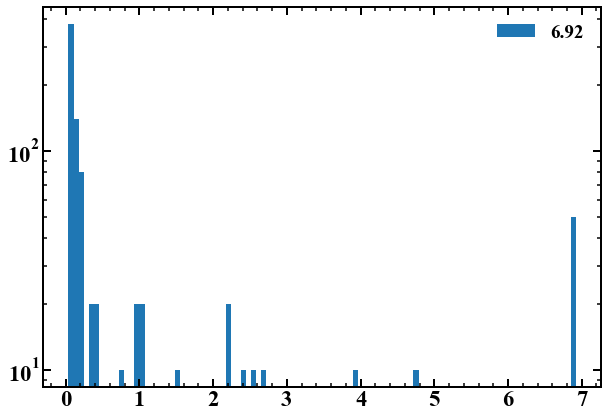

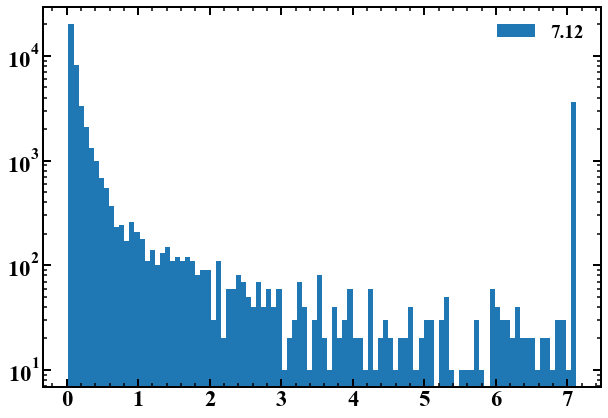

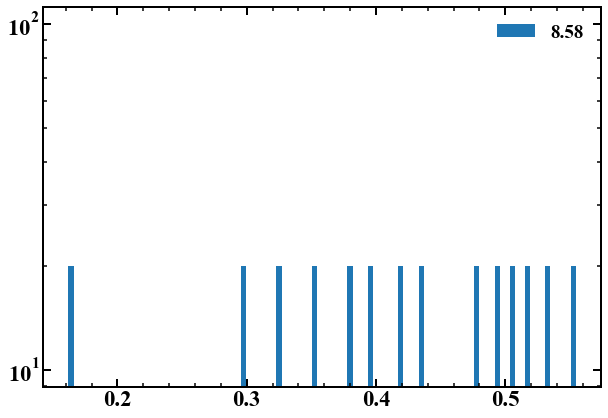

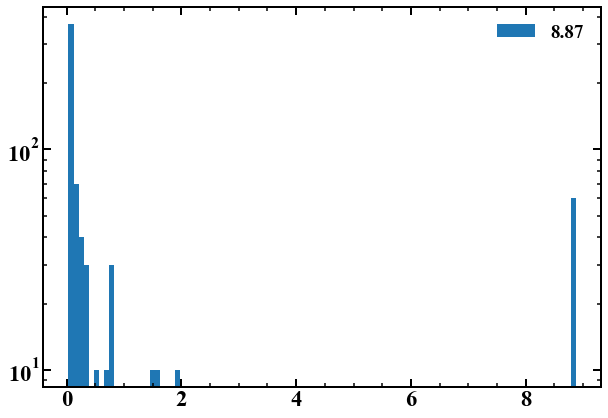

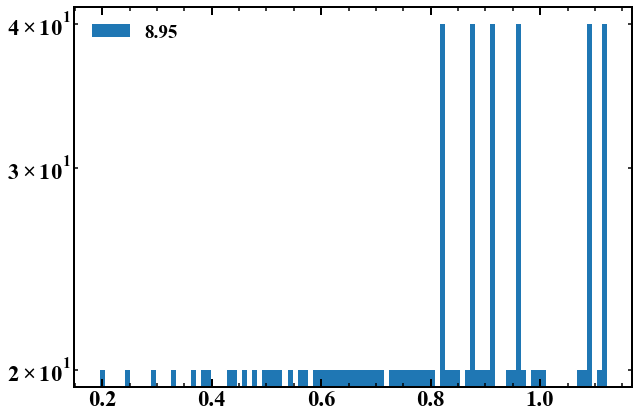

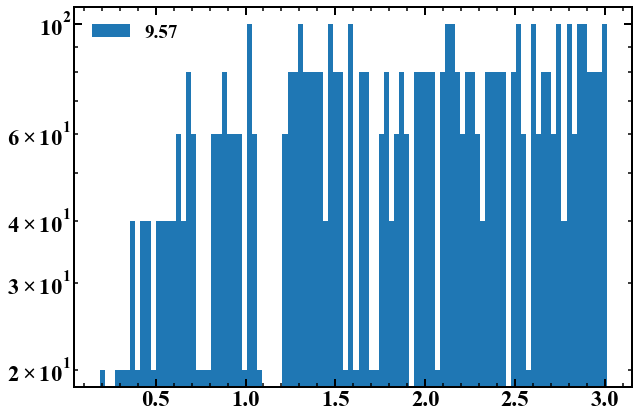

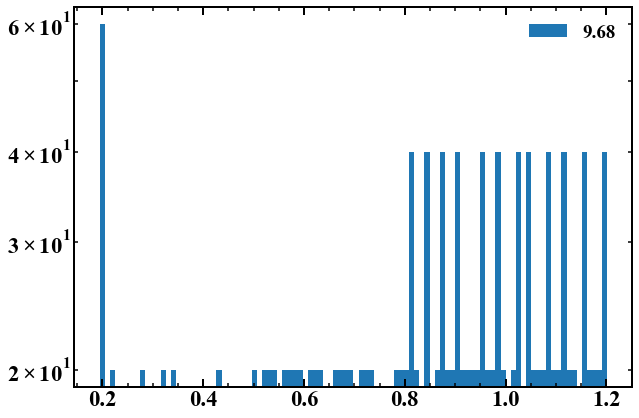

In [73]:
j = read_data('4mm_1_data.root')

flist = [f for f in os.listdir() if '1mm' in f]
flist = [f for f in flist if 'data' in f]
print(flist)

j = read_data(flist)

plt.hist(j.pe, bins=np.linspace(0,100,101), label='Trigger Charge')
plt.xlim(0,100)
plt.yscale('log')
plt.legend()
plt.show()

for e,v in j.gamma.items():
    plt.hist(v, bins=100, label=f'{e:0.2f}')
    plt.legend()
    plt.yscale('log')
    plt.show()